In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
df = datasets.load_diabetes() 

In [3]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
db = pd.DataFrame(df.data, columns = df.feature_names)

In [5]:
db['target'] = df.target

In [6]:
db.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
db.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


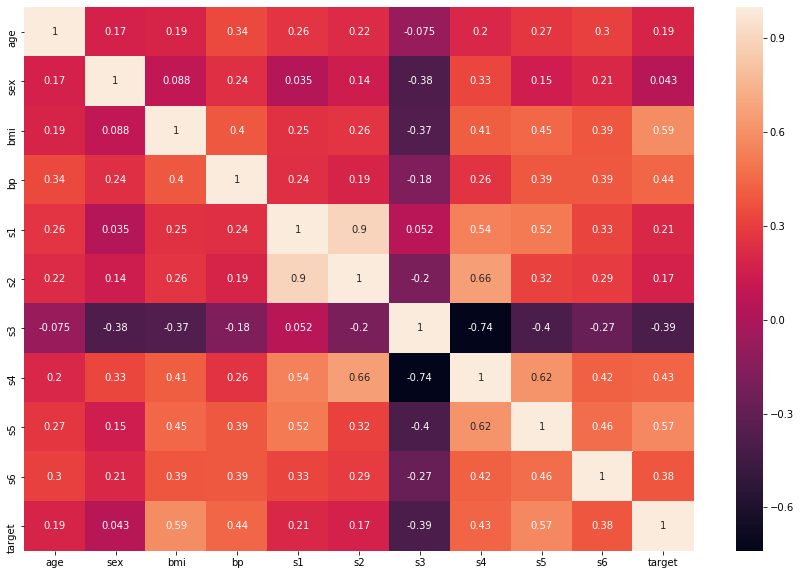

In [9]:
plt.figure(figsize = (15,10))
sns.heatmap(db.corr(), annot = True)
plt.show()

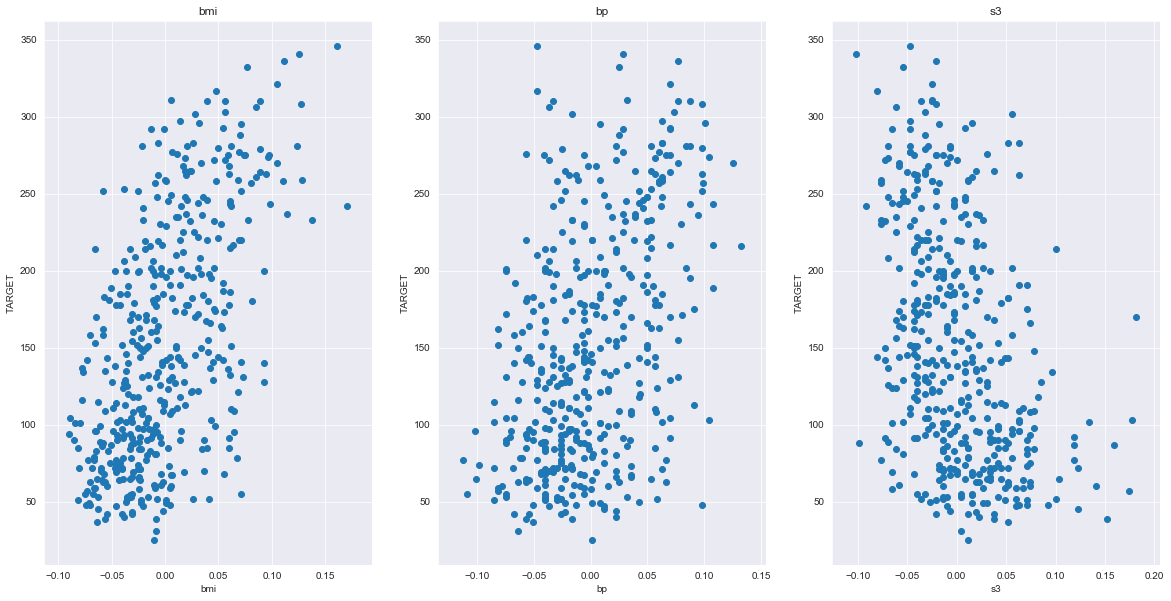

In [10]:
sns.set_style('darkgrid')
features = ['bmi', 'bp', 's3']
features1 = ['s4', 's5', 's6']
target = db['target']
plt.figure(figsize = (20,10))

for i,col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = db[col]
  y = target
  plt.scatter(x, y, marker = 'o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('TARGET')
plt.show()

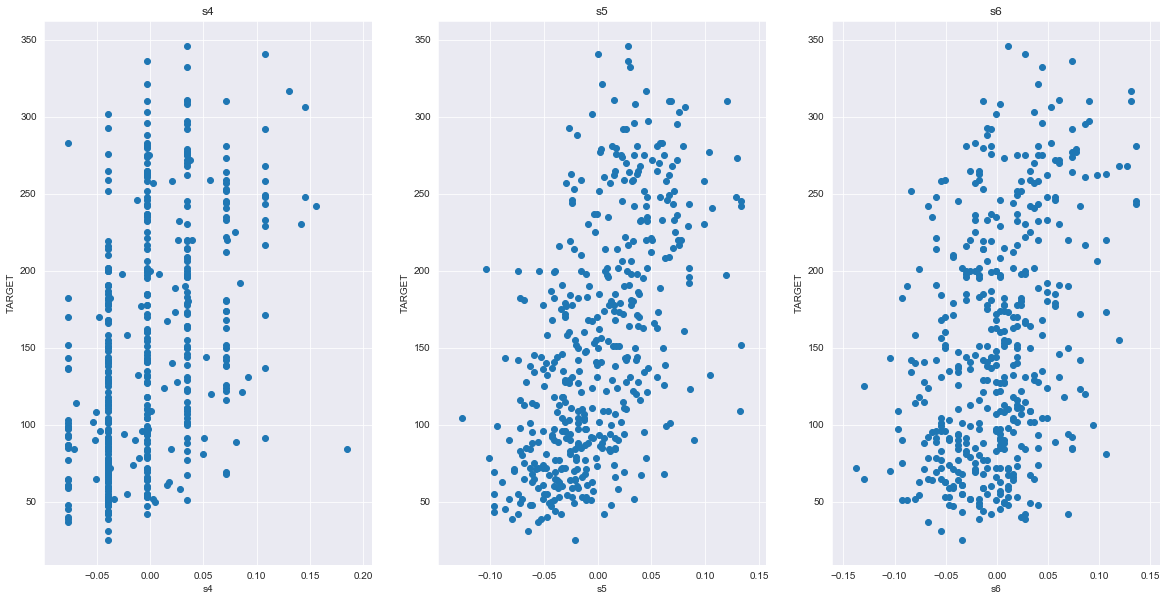

In [11]:
sns.set_style('darkgrid')
features1 = ['s4', 's5', 's6']
target = db['target']
plt.figure(figsize = (20,10))

for i,col in enumerate(features1):
  plt.subplot(1, len(features1), i+1)
  x = db[col]
  y = target
  plt.scatter(x, y, marker = 'o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('TARGET')
plt.show()

In [12]:
X = db[['bmi', 'bp', 's3', 's4', 's5', 's6']]
Y = db['target']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(X)
x_poly

array([[ 1.00000000e+00,  6.16962065e-02,  2.18723550e-02, ...,
        -6.99395739e-06,  6.19919823e-06, -5.49475162e-06],
       [ 1.00000000e+00, -5.14740612e-02, -2.63278347e-02, ...,
        -4.30496454e-04, -5.80911244e-04, -7.83880728e-04],
       [ 1.00000000e+00,  4.44512133e-02, -5.67061055e-03, ...,
        -2.12659419e-07,  1.92554912e-06, -1.74351056e-05],
       ...,
       [ 1.00000000e+00, -1.59062628e-02,  1.72818607e-02, ...,
         3.40437594e-05, -1.12493283e-05,  3.71719776e-06],
       [ 1.00000000e+00,  3.90621530e-02,  1.21513083e-03, ...,
        -5.14140562e-05,  2.99400986e-05, -1.74351056e-05],
       [ 1.00000000e+00, -7.30303027e-02, -8.14137658e-02, ...,
         5.45686002e-08, -3.96270359e-08,  2.87766585e-08]])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [15]:
logit = linear_model.LinearRegression()
logit.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
logit.score(X_test, Y_test)

0.4052363854533301

In [17]:
Y_pred = logit.predict(X_train)


In [18]:
from sklearn import neighbors 
clf = neighbors.KNeighborsClassifier(n_neighbors= 10)
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
clf.score(X_train,Y_train)

0.11048158640226628